# Car Resale Price Prediction

**Introduction:**

In this case study, we focus on on forecasting the resale value of cars using a Linear Regression approach. The dataset contains details about various vehicles, such as their selling price, year, kilometers driven, engine capacity, max power, make, model, transmission type, and various other features.

**Objective:**

Our goal is to develop a model capable of predicting a car’s resale price based on its attributes. Such a tool can assist both buyers and sellers in the pre-owned car market by providing insights into the factors influencing resale prices.


## Data Exploration

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
# reading a CSV file named "data.csv" located in the "Data" folder on the your Google Drive and stores it as a DataFrame df
# write your data file path
df = pd.read_csv('../data/CarPred.csv')

- selling_price: Selling price of the car (in lakhs).
- year: Manufacturing year of the car.
- km_driven: Kilometers driven by the car.
- engine: Engine capacity (cc).
- max_power: Maximum power output.
- make: Car brand (e.g., Suzuki, Maruti, Honda).
- model: Car model (e.g., Swift, Baleno, City).
- transmission_type: Transmission type of the car(0 = manual, 1 = automatic).
- seats_cop: Presence of cop seats represented with binary variable (0 or 1).
- seats_family: Presence of family seats (0 or 1).
- seats_large: Presence of large seats (0 or 1).
- fuel_cng, fuel_diesel, fuel_electric, fuel_lpg, fuel_patrol: Fuel type indicators (0 or 1).
- seller_dealer: Seller is a dealer (0 or 1).
- seller_self: Seller is an individual (0 or 1).

In [62]:
df.head()

,make,transmission_type,seats_cop,seats_family,seats_large,fuel_cng,fuel_diesel,fuel_electric,fuel_lpg,fuel_patrol,seller_dealer,seller_self,year,km_driven,engine,max_power,model,selling_price
0,hyundai,0,0,0,1,0,0,1,0,0,0,1,2009,42945,2492,287,verna,210447.937555
1,toyota,0,0,0,1,0,0,0,0,1,1,0,2003,176401,3240,88,corolla,272870.715932
2,ford,1,0,0,0,0,0,0,0,1,1,1,2018,46852,3250,169,aspire,251387.190744
3,honda,1,0,0,0,0,1,0,0,0,1,1,2014,162580,1317,99,jazz,139196.325731
4,hyundai,1,0,0,1,0,1,0,0,0,1,1,2004,11264,3268,196,i10,227022.794299


In [63]:
df.shape

(20000, 18)

Problem Type & Reason:
This is a supervised learning problem (not unsupervised) because we train the model using historical data where the target variable (selling price) is already known.

Objective Type & Reason:
The objective is regression (not classification) since the task involves predicting a continuous numerical value — the selling price in lakhs.

The use case for linear regression in this scenario is justified by the nature of the problem and the characteristics of the data.

The goal is to predict the resale price of cars (target variable: selling price).
The problem involves predicting a continuous numeric variable, which aligns with the characteristics of a regression problem.

Single Input Variable:
For simplicity and as a starting point, the analysis focuses on a single input variable, max power.
Simple Linear Regression is chosen due to having only one predictor variable initially.

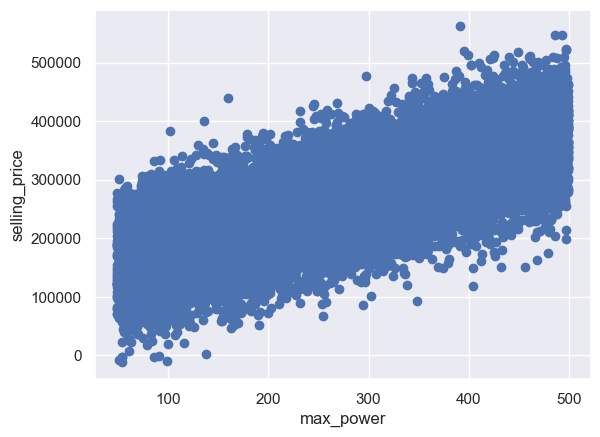

In [64]:
#define x and y
x = df["max_power"].values
y = df["selling_price"].values

plt.scatter(x, y)
plt.xlabel("max_power")
plt.ylabel("selling_price")
plt.show()

**Linear Relationship Assumption:**
In linear regression, we assume that the connection between the input feature (max power) and the output (selling price) can be captured with a straight-line equation.
From the exploratory data analysis — such as reviewing scatter plots and checking correlation values — the data suggests a relationship that is linear or close to linear between max power and selling price.

## Assumptions in Linear Regression
- Linearity
- Homoscedasticity
- Normality of Errors
- No Autocorrelation
- No Perfect Multicollinearity
- Outlier check

### Linearity

The link between the independent variable(s) and the dependent variable is assumed to be linear. In other words, when the independent variable(s) change, the dependent variable changes at a consistent rate, maintaining a proportional relationship.

#### Simulation for Linearity

In [65]:
# Fit linear regression model
X = df[['year', 'km_driven', 'engine', 'max_power', 'transmission_type', 'seats_cop', 'seats_family', 'seats_large', 'fuel_cng', 'fuel_diesel', 'fuel_electric', 'fuel_patrol', 'fuel_lpg', 'fuel_electric', 'seller_dealer', 'seller_self']]
y = df['selling_price']

In [66]:
import statsmodels.api as sm
# Add a constant term for intercept
X_with_const = sm.add_constant(X)

In [67]:
# Fit a linear regression model using Ordinary Least Squares (OLS) from statsmodels
# 'y' is the dependent (target) variable
# 'X_with_const' is the matrix of independent variables (features) 
#     plus a constant column for the intercept (added earlier with sm.add_constant)
# OLS will estimate coefficients that minimize the sum of squared residuals
# The .fit() method runs the regression and returns a fitted model object
model = sm.OLS(y, X_with_const).fit()

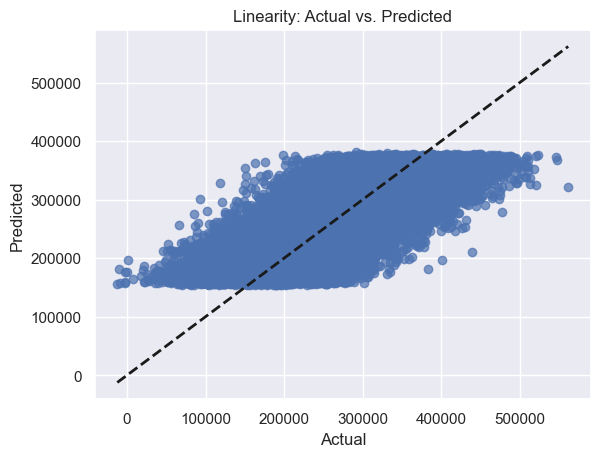

In [68]:
# Check linearity assumption by plotting actual vs. predicted values
# A good linear regression model should have predicted values that align closely
# with the actual values in a straight line.

# Create a scatter plot:
# x-axis = actual target values (y)
# y-axis = predicted target values from the fitted model
# alpha=0.7 makes the points slightly transparent so overlapping points are visible
plt.scatter(y, model.predict(), alpha=0.7)

# Plot a reference "perfect prediction" line:
# The line goes from the minimum to maximum values of y in both x and y directions
# 'k--' means a black dashed line, lw=2 means line width is 2
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linearity: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


By visually inspecting the scatter plot of actual versus predicted values, We can assess whether our linear regression model follows the linearity assumption.

If the points form a reasonably straight line, it suggests that the assumption holds, whereas nonlinear patterns may indicate violations of the linearity assumption.

### Homoscedasticity
this assumption states that the variance of the errors is constant across all levels of the independent variables. In practical terms, this means that the spread of the residuals should remain approximately the same as the predicted values increase. A violation of this assumption results in heteroscedasticity.

#### Simulation for Homoscedasticity

In [69]:
# Check homoscedasticity by plotting residuals vs. predicted values
# 'model.resid' gives the residuals from the fitted regression model.
# Residual = Actual value (y) - Predicted value (ŷ)
# These residuals show the error between what the model predicted and what actually happened.
residuals = model.resid

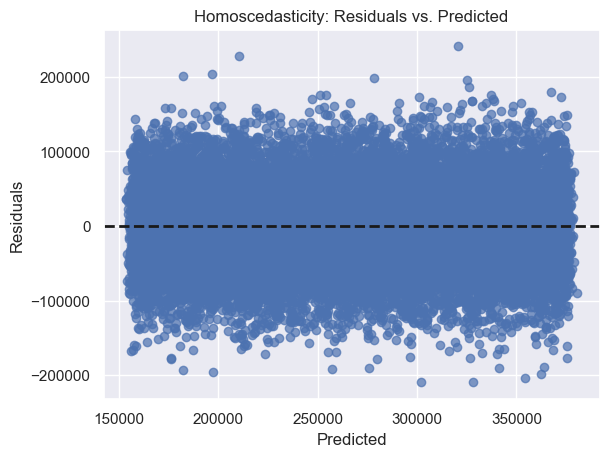

In [70]:
# Create a scatter plot of predicted values (x-axis) vs residuals (y-axis)
# This helps us check for homoscedasticity (equal spread of residuals across all predicted values)
plt.scatter(model.predict(), residuals, alpha=0.7)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Homoscedasticity: Residuals vs. Predicted')

# Draw a horizontal dashed line at y=0 to indicate where residuals should ideally center
# If the residuals are evenly spread above and below this line, homoscedasticity is satisfied
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.show()

Based on the plot generated by above simulation, you can evaluate whether your dataset follows the homoscedasticity assumption by examining these characteristics. If the scatter plot shows a consistent spread of residuals around the zero line with no clear pattern or trend, it suggests that the data satisfies the homoscedasticity assumption. However, if you observe a non-constant spread or any systematic pattern in the residuals, it may indicate potential violations of homoscedasticity, requiring further investigation and possibly model refinement.

### Normality of Errors
The errors (residuals) of the model are normally distributed. This means that if you were to plot the distribution of residuals, it should resemble a bell curve or Gaussian distribution. While this assumption is not strictly necessary for large sample sizes (thanks to the Central Limit Theorem), it can be important for smaller sample sizes to ensure the validity of statistical tests and confidence intervals.

#### Simulation for Normality of Errors

To assess the normality of errors based on the histogram of residuals, you'll need to interpret the shape and distribution of the histogram.

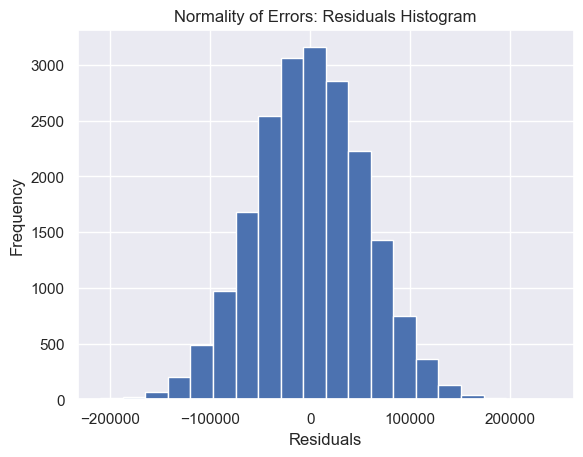

In [71]:
# Check normality of errors by plotting a histogram of residuals

# Create a histogram of residuals (differences between actual and predicted values)
# 'bins=20' divides the range of residual values into 20 equal intervals
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Normality of Errors: Residuals Histogram')
plt.show()

If the histogram exhibits a roughly bell-shaped curve with a single peak and comparable frequencies in each bin, it suggests that the residuals are approximately normally distributed.

However, if the histogram shows significant deviations from these patterns, it may indicate potential violations of the normality assumption, requiring further investigation and possibly transformation of the data.

### No Autocorrelation

When working with time series or any data arranged in a sequence, this assumption means that the residuals should be independent from one another. If residuals from one point are related to those from nearby points — a situation known as autocorrelation — it breaks the independence rule. This can distort parameter estimates and lead to unreliable statistical conclusions.

#### Simulation for No Autocorrelation

The Durbin-Watson statistic is a test used to detect the presence of autocorrelation in the residuals of a regression model.

In [72]:
# Check independence of errors using Durbin-Watson test (DW statistic)
durbin_watson = sm.stats.stattools.durbin_watson(residuals)
print("Durbin-Watson statistic:", durbin_watson)

Durbin-Watson statistic: 2.01352969275313


The test statistic ranges from 0 to 4, with values close to 2 indicating no significant autocorrelation.

Based on the Durbin-Watson statistic generated by the simulation, you can evaluate whether your dataset follows the assumption of no autocorrelation.

If the Durbin-Watson statistic is close to 2 (typically between 1.5 and 2.5), it suggests that there is no significant autocorrelation in the residuals, indicating that the assumption of independence of errors is met.

However, if the statistic deviates substantially from 2, it may indicate the presence of autocorrelation, requiring further investigation and possibly model adjustments.

### No Perfect Multicollinearity

In multiple linear regression, the independent variables should not be perfectly related to each other. If one variable can be exactly calculated from another (or a mix of others), it’s called perfect multicollinearity. This makes it impossible to figure out the separate impact of each variable on the outcome.

#### Simulation for No Perfect Multicollinearity

The Variance Inflation Factor (VIF) is used in regression to check how strongly independent variables are related to each other.
When two or more predictors are highly correlated (multicollinearity), it can:
- Make coefficient estimates unstable.
- Inflate their variances, making it harder to judge each variable’s true effect.
- Instability of the model: Small changes in the data can lead to large changes in the estimated coefficients.

A VIF of 1 means no correlation; higher values indicate stronger multicollinearity. As a rule of thumb:

- VIF < 5: No issue.

- 5–10: Moderate concern.

- VIF >10: Serious issue — consider fixing it.

Ways to reduce multicollinearity include removing less important variables, combining similar ones, or using techniques like ridge regression or LASSO.

In [73]:
# Check for multicollinearity using variance inflation factor (VIF)

# VIF is used to detect multicollinearity between independent variables.
# A high VIF means that the variable is highly correlated with other variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X_with_const.copy()

# Remove the constant column ("const") because VIF should only be calculated for actual features
vif_data = vif_data.drop(columns='const')

# Create an empty DataFrame to store results
vif = pd.DataFrame()

# Add the feature/variable names
vif["Variable"] = vif_data.columns

# Calculate the VIF for each variable
# variance_inflation_factor() takes:
#  - The array of all features
#  - The index of the feature for which VIF is being calculated
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]


print(vif)

             Variable        VIF
0                year  56.648571
1           km_driven   4.007914
2              engine   7.729838
3           max_power   5.478773
4   transmission_type   1.998263
5           seats_cop   2.010321
6        seats_family   3.019145
7         seats_large   5.036540
8            fuel_cng   1.994996
9         fuel_diesel   3.047902
10      fuel_electric        inf
11        fuel_patrol  17.090605
12           fuel_lpg   9.085081
13      fuel_electric        inf
14      seller_dealer   1.995045
15        seller_self   1.977211


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


## Hypothesis in Linear Regression

A hypothesis in linear regression is a mathematical way of describing how the input variable (X) relates to the output variable (Y).

The aim is to find a straight-line equation that best matches the data so we can predict Y from X.

The equation is:
Y = Θ₀ + Θ₁·X

Where:

Y – This is the dependent variable or the target variable that we want to predict (e.g., resale price of a car).

X – This is the independent variable or the input feature used for prediction (e.g., maximum power of a car).

Θ₀ – The intercept, meaning the value of Y when X is 0 (the baseline).

Θ₁ – The slope, meaning how much Y changes for each unit change in X.

The model’s job is to find the best Θ₀ and Θ₁ that make predictions as close as possible to the real Y values in the training data. This process is called training the model.

Once the model is trained, you can use it to predict the values of Y for new or unseen values of X. The linear equation provides a straight-line approximation of the relationship between the input and output variables. The goal is to have a line that best fits the data points in a way that it can generalize well to make accurate predictions for new data.

### Cost Function



**Cost Function in Linear Regression**

The cost function measures how well a model fits the data by quantifying the error between predicted and actual values.  
A common choice is **Mean Squared Error (MSE)**:
 
In linear regression, the most common cost function is **Mean Squared Error (MSE)**, which calculates the average of the squared differences between predicted and actual values in the training set.  

The goal during training is to minimize this error by adjusting the model parameters, often using optimization algorithms like **gradient descent**.


When working with linear regression, we aim to find the best line that fits the training data. The cost function measures the difference between the predicted values of the model and the actual target values. By minimizing this cost function, we can determine the optimal values for the model's parameters and improve its performance.

### Feedback

In machine learning, particularly in linear regression, feedback is the process of using the cost function’s output to adjust the model’s parameters and reduce errors.  
This creates a loop where the model learns from mistakes, updates its parameters, and improves predictions until the cost becomes minimal, meaning the model fits the training data well.

### Gradient Decent

Gradient Descent is an iterative method used in machine learning to minimize a cost (or loss) function.It's widely employed in various optimization problems, especially in training machine learning models. 
It works by gradually adjusting model parameters to find the values that give the lowest error.

**How it works:**
1. **Initialize parameters** 
- Initialize the parameters (weights) randomly or with some predefined values.
- Choose a learning rate (α) to control step size.  
2. **Calculate the cost** to measure the gap between predictions and actual values.  
- Evaluate the cost function (or loss function) for the current parameter values.
- The cost function quantifies the difference between predicted values and actual values.
3. **Find the gradients** of the cost function with respect to each parameter.
- Gradients indicate the direction and magnitude of the steepest increase of the function.
4. **Update parameters** by moving in the opposite direction of the gradients:  
   θ ← θ − α × (∂J/∂θ)  
5. **Repeat** until the cost stops changing significantly or a set number of steps is reached.  

Choosing the right learning rate is key — too high can overshoot the minimum, too low makes convergence slow.

#### Defining univariate_linear_hypothesis funtion

In [74]:
# This function represents a **univariate linear hypothesis**,
# which is simply a straight-line equation used to predict output values.
#
# Arguments:
#   x      : The input value(s) (can be a number or an array of numbers).
#   theta  : A list or array containing two parameters:
#              theta[0] → intercept (y-axis starting point)
#              theta[1] → slope (how much y changes for each change in x)
#
# The function returns the predicted output (y_hat) using the formula:
#   y_hat = intercept + slope * x

def univariate_linear_hypothesis(x, theta):
    y_hat = theta[0] + theta[1] * x
    return y_hat


#### Defining cost funtion

In [75]:
# We need to define our cost function, and in this case, we are using the mean squared error as the cost function.
# The cost function takes input vectors X and Y, and a list theta containing two values (Theta 0 and Theta 1).
# It computes the predicted values (Y hat) using the univariate linear hypothesis and calculates the mean squared error.

def cost(X, Y , theta):
  m = X.shape[0] # Total number of training examples
  total_error = 0.0

  # Calculate the total error by summing up squared differences for each observation
  for i in range(m):
      y_hat = univariate_linear_hypothesis(X[i], theta)  # Predicted value
      total_error += (y_hat - Y[i])**2  # Square of the difference (residual) for each observation

  # Calculate and return the mean squared error
  return total_error / m


Before jumping into the details of gradient descent, let’s see how it works with a simple example.

We’ll use the function y = (x – 5)², which has its lowest point at x = 5, where the value is zero.

By plotting this function, we can visualize its shape and then show how gradient descent can iteratively move toward this minimum point.

#### Creating simple convex funtion

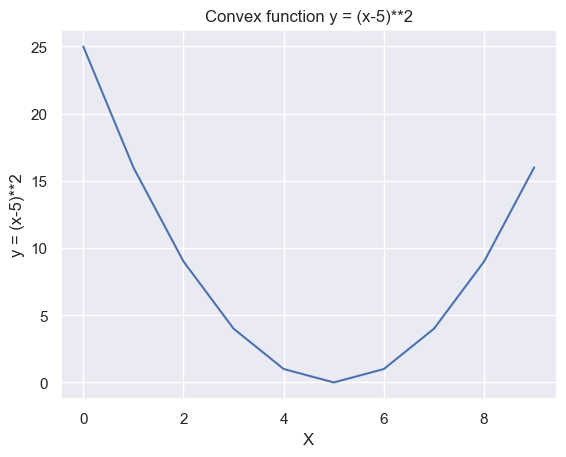

In [78]:
# We are creating a simple convex function y = (x-5)^2.
# Our goal is to visualize this function and demonstrate how the gradient descent approach works.
# This will help in understanding how gradient descent finds the minimum point.

import seaborn as sns

# Apply Seaborn's default theme
sns.set_theme()

# Create some random data for X values
X = np.arange(10)

# Define the convex function y = (x-5)^2
Y = (X-5)**2  # Minimum value (0) occurs when X = 5

# Plot the convex function

plt.plot(X, Y)
plt.xlabel("X")
plt.ylabel("y = (x-5)**2")
plt.title("Convex function y = (x-5)**2")
plt.show()

Above code creates a simple convex function and visualizes it using Matplotlib. The plot shows a smooth, U-shaped curve, and the minimum point occurs at X = 5 where the cost is zero.

Starting with X = 0, the cost f(x) = (X – 5)² is 25.
The gradient tells us how steep the slope is at a certain point and in which direction we should move to reach the minimum.
For the function f(x) = (X – 5)², the gradient at any point X is 2 × (X – 5) (this comes from the derivative of the cost function)

If the gradient is positive, we need to move left (decrease X ).
If it’s negative, we need to move right (increase X ).

- If X is greater than 5, (X – 5) is positive → gradient is positive → slope goes upward to the right → move left (decrease X).
- If X is less than 5, (X – 5) is negative → gradient is negative → slope goes downward to the right → move right (increase X).

The update rule is X₁ = X₀ – 2 × (X₀ – 5), since the gradient is 2 × (X – 5). 

Without a learning rate, these steps can be too large, causing the algorithm to overshoot the minimum, oscillate, or even diverge—especially on uneven convex surfaces where smaller steps are needed for smooth convergence.

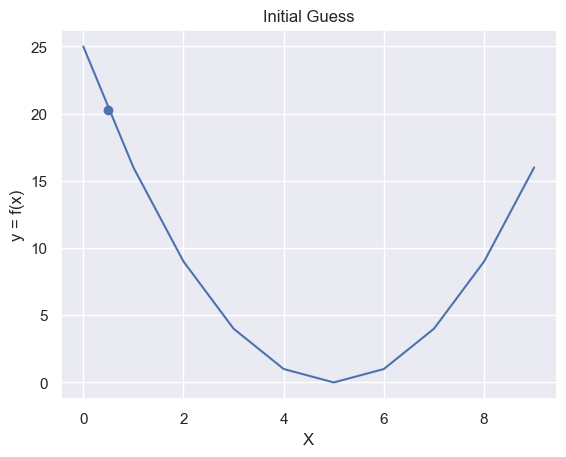

In [79]:
x = 0.5

y = (x-5)**2
plt.plot(X,Y)

plt.scatter(x,y)

plt.xlabel("X")
plt.ylabel("y = f(x)")
plt.title("Initial Guess")
plt.show()

The above code shows a rapid decrease in the cost function values but exhibits a large jump between consecutive iterations.

#### Gradient Descent Visualization - With Learning Rate

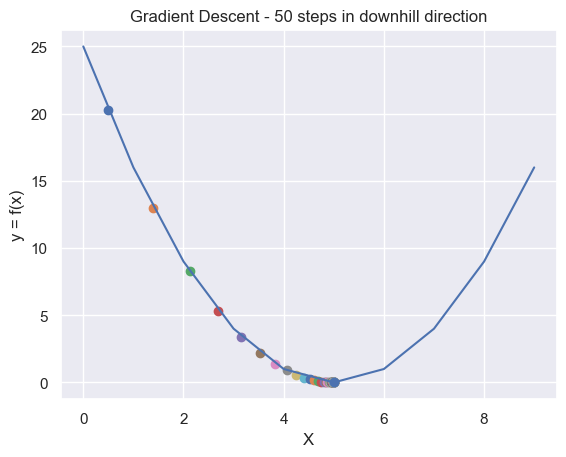

In [86]:
# Similar to the above code, we are initializing x to 0.5.
# It iterates 50 times, but this time updates x using the learning rate (lr) multiplied by the gradient (grad).
# The learning rate controls the step size in the downhill direction.

import time

fig = plt.figure()
# Create a single subplot in the figure (1 row, 1 column, 1st plot) and assign it to 'ax' for further customization if needed.
ax = fig.add_subplot(111)
plt.ion() # Turn on interactive mode for live plot updates

x = 0.5 # Starting point for gradient descent
y = (x-5)**2 # Calculate initial cost

plt.plot(X,Y) # Plot the convex function curve
plt.scatter(x,y) # Mark the starting point
plt.xlabel("X")
plt.ylabel("y = f(x)")
plt.title("Gradient Descent - 50 steps in downhill direction")
# plt.show()

lr = 0.1           # Learning rate controlling the step size
errors = []        # Store error values at each step

for i in range(50):
  # Calculate gradient at current x
  grad = 2*(x-5)

  # Update x by moving against the gradient scaled by learning rate
  x = x- lr*grad

  # Compute new cost value
  y = (x-5)**2

  error = y - 0          # Error is how far from minimum (which is 0)
  errors.append(error)
  plt.scatter(x, y)      # Plot current position
  fig.canvas.draw()      # Update the plot
  time.sleep(0.2)        # Pause so changes are visible
plt.show()


The code shows a smoother descent with smaller steps, allowing the algorithm to approach the minimum point more gradually.

The main change is adding a learning rate to control how big each step is during updates.
Without it, the updates can be too large, causing unstable jumps.
Using a learning rate helps the algorithm move steadily toward the minimum without overshooting.

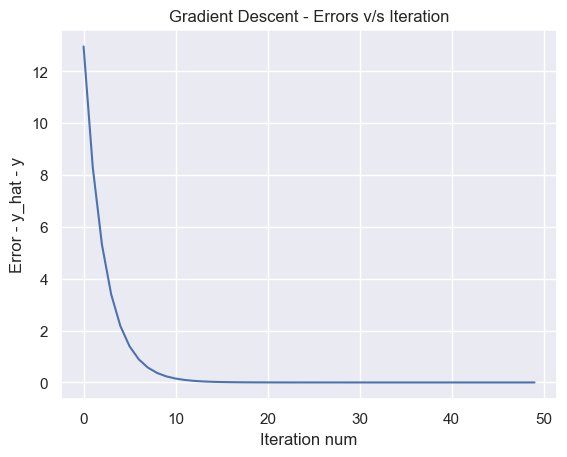

In [87]:
plt.plot(errors)
plt.xlabel("Iteration num")
plt.ylabel("Error - y_hat - y")
plt.title("Gradient Descent - Errors v/s Iteration")
plt.show()

**When to stop gradient descent is important:**
Gradient descent minimizes a cost function by updating parameters step-by-step. Knowing when to stop these updates is key—stop too soon, and the solution may be poor; run too long, and you waste resources.

- **Fixed iterations:**
A common method is to set a fixed number of steps (like 50). This is a simple choice, often based on experience or time limits.
- **Early stopping for efficiency:**
Setting a fixed number of iterations is simple but not always efficient. Early stopping dynamically ends training when the algorithm detects it has reached a good enough solution, avoiding unnecessary extra steps.

**Common early stopping methods:**

- **Convergence check:** Stop if the cost or parameters change very little between steps. If the change falls below a predefined threshold, the algorithm can stop.

- **Validation performance:** Stop if model accuracy on separate validation data stops improving or worsens.

- **Max iterations:** A safety limit to avoid endless running if convergence doesn’t happen.

Balancing these helps save time while still reaching a good solution. Fixed steps give a baseline, while early stopping adds flexibility to avoid unnecessary work.

## Use Case Simulation

- Develop a univariate linear regression model to predict the selling price based on the input variable, max power.
- Create three functions: one for the linear hypothesis, one to calculate gradients, and one to measure error.
- Use gradient descent to adjust the model parameters (Theta 0 and Theta 1) for better accuracy.
- Stopped gradient descent after a fixed number of iterations (e.g., 50).
- Explain the importance of early stopping conditions for efficiency.

In [88]:
X = df["max_power"]
Y = df["selling_price"]

# Normalize 'max_power' using standard normalization
# Standard normalization: scale data to zero mean and unit variance
# This rescales data to have mean 0 and standard deviation 1
# Normalization helps gradient descent converge faster and prevents features with large values from dominating

u = X.mean()            # Calculate mean of 'max_power'
std = X.std()           # Calculate standard deviation of 'max_power'

X = (X - u) / std       # Normalize X to have mean 0 and standard deviation 1


Normalization—especially standardization (subtract mean, divide by std)—helps keep values manageable. Scaling inputs this way avoids issues with differing magnitudes and improves gradient descent efficiency.

### Linear Regression Hypothesis Function

In [89]:
def hypothesis(x, theta):
    # Linear hypothesis function: h(x) = theta[0] + theta[1]*x
    y_hat = theta[0] + theta[1]*x
    return y_hat

### Gradient Computation for Linear Regression

In [91]:
def gradient(X, Y, theta):
    m = X.shape[0]
    grad = np.zeros((2,))  # Initializing gradient vector with zeros for Theta 0 and Theta 1

    for i in range(m):
        x = X[i]  # Current input

        # Predicted value using current parameters
        y_hat = hypothesis(x, theta)  # Computing hypothesis for the current input

        # Actual output
        y = Y[i]

        # Updating gradients for Theta 0 and Theta 1

        # Accumulate gradient for θ0 (intercept)
        grad[0] += (y_hat - y)  # Partial derivative of cost with respect to Theta 0

        # Accumulate gradient for θ1 (slope)
        grad[1] += (y_hat - y)*x  # Partial derivative of cost with respect to Theta 1

    return grad/m  # Average gradient over all training examples

These derivatives are computed within the gradient function and are fundamental for updating the parameters during the gradient descent process. They capture the sensitivity of the cost function to changes in Theta 0 and Theta 1

### Error Calculation for Linear Regression

In [92]:
def error(X, Y, theta):
    m = X.shape[0]  # Number of examples in the dataset
    total_error = 0.0  # Initialize the total error

    for i in range(m):
        x = X[i]  # Current input
        y_hat = hypothesis(x, theta)  # Compute hypothesis for the current input
        y = Y[i]  # Actual output

        # Compute the squared error for the current example
        error_i = (y_hat - y)**2
        total_error += error_i  # Accumulate the squared error

    return (total_error/m)  # Return the mean squared error

### Gradient Descent Optimization for Linear Regression

In [93]:
def gradient_descent(X, Y, max_steps=100, learning_rate=0.1):
    theta = np.zeros((2,))  # Initialize weights Theta 0 and Theta 1 to zero
    error_list = []  # List to store errors during iterations
    theta_list = []  # List to store Theta values during updates

    for i in range(max_steps):
        # Compute gradient using the gradient function
        grad = gradient(X, Y, theta)

        # Compute error using the error function
        e = error(X, Y, theta)

        # Update weights Theta 0 and Theta 1 using the learning rate and gradients
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]

        # Store the updated Theta values during each iteration
        theta_list.append((theta[0], theta[1]))
        # Store the error during each iteration
        error_list.append(e)

    return theta, error_list, theta_list

In [94]:
theta, error_list, theta_list = gradient_descent(X, Y, max_steps=50)
print(theta)

[264899.50073976  63179.87873954]


theta0 = 264899.50073976 theta1 = 63179.87873954

Y = theta0 + theta1.X

Here, X is normalised

### Animate Visualization of Linear Regression Training

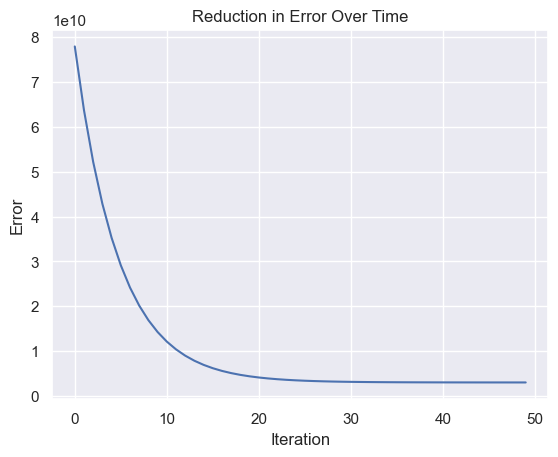

In [95]:
# Initialize a new figure for the plot
fig = plt.figure()

# Plot the error values over iterations
plt.plot(error_list)

# Set the title and axis labels for better interpretation
plt.title('Reduction in Error Over Time')
plt.xlabel('Iteration')
plt.ylabel('Error')

# Display the plot
plt.show()

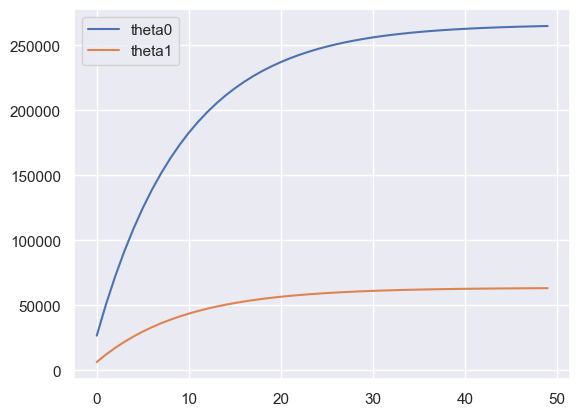

In [96]:
# Initialize a new figure for the plot
fig = plt.figure()

# Extract Theta 0 and Theta 1 values from the 'theta_list'
# Convert list of theta values to a NumPy array for easier indexing
theta_list = np.array(theta_list)

# Plot the changes in Theta 0 and Theta 1 over iterations
plt.plot(theta_list[:, 0], label="theta0")
plt.plot(theta_list[:, 1], label="theta1")

# Show a legend to distinguish between theta0 and theta1 lines
plt.legend()

# Display the plot
plt.show()

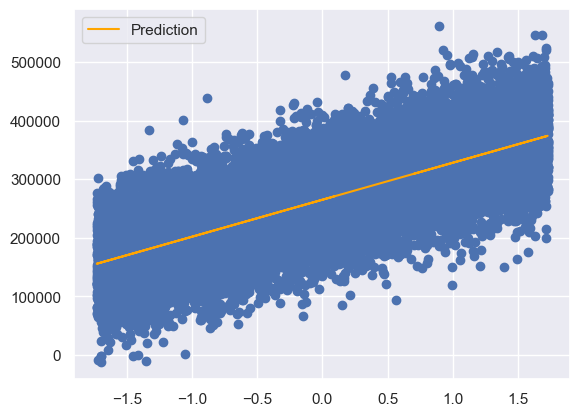

In [97]:
# Initialize a new figure for the plot
fig = plt.figure()

# Compute predicted values using the trained model parameters
Y_hat = hypothesis(X, theta)

# Scatter plot of the original data points
plt.scatter(X, Y)

# Plot the regression line representing the model's predictions in orange
plt.plot(X, Y_hat, color='orange', label='Prediction')

# Add a legend for better interpretation
plt.legend()

# Display the plot
plt.show()